![image](images/MSTICPyCon2021.png)

---

<h1 style="background-colSilveGray; padding: 10px">MSTICPy - Coding challenges and solutions building a Python package for CyberSec</h1>

### Ian Hellen, Principal Dev, in Microsoft Threat Intelligence Center (MSTIC)
### @ianhellen (twitter), ianhelle@microsoft.com

---

![image](images/MSPyCon.png)
yCon.png)

---

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Introduction</h1>


<h2 style="background-color: LightBlue; padding: 10px">MSTICPy</h2>

### - Pronounced *mystic-pie*
### - A collection of tools for Cyber investigators
### - Open source, Python (obviously!)
### - Targeted at Jupyter notebooks but a lot of functionality works in straight Python
### - 2+ yrs old
### - Just released v 1.0.0 (no longer a beta!!!)
### - Primarily developed for use in Azure Sentinel but mostly data-source agnostic
<br>

---

<h2 style="background-color: LightBlue; padding: 10px">MSTICPy Contents</h2>

#### - Data aquisition - data providers and queries
#### - Data enrichment - Threat Intel, Geo-IP, Azure resource properties
#### - Visualization - Event timelines, process tree, widgets
#### - Analysis - Anomaly detection, decoding, IoC extraction

#### - **Partway to being as much of a framework as a toolkit**
<br>

---
<h2 style="background-color: LightBlue; padding: 10px">Overview of this Session</h2>

- **Pandas Accessors** - extend you favorite data manipulation library
- **Data Providers** - generating functions from configuration
- **Pivot Functions** - wrapping functions to make them do your bidding
- **Widget composition** - build the world in IPywidgets without a single line of javascript
- **Dynamic docstrings** - you need to document your dynamic functions
- **Miscellaneous topics**
  - implement `__repr__` for your (data) classes
  - creating beautiful and informative exceptions
  - split your dependencies with extras
    
---

<h3 style="background-color: LightGray; padding: 5px">Getting started - We need to intialize a few things</h3>

- MSTICPy
- Data Providers
- Pivot functions
- Notebooklets

In [481]:
# If you haven't installed msticpy and msticnb, uncomment these lines
# !pip install msticpy
# !pip install msticnb

# Core MSTICPy initialization for Notebooks
from msticpy.nbtools import nbinit
nbinit.init_notebook(namespace=globals());

# Load query providers (typically you'll be using one)
qry_prov_az = QueryProvider("AzureSentinel")
qry_prov_sp = QueryProvider("Splunk")
qry_prov_mde = QueryProvider("MDE")
# Special provider that uses local data files
qry_prov_loc = QueryProvider("LocalData", data_paths=["./data"], query_paths=["./data"])

# Import and initialize dynamic pivot functions - more later
from msticpy.datamodel.pivot import Pivot
pivot = Pivot(namespace=globals())

# Import and initialize MSTIC Notebooklets - companion package
# more later
import msticnb as nb
nb.init(query_provider="AzureSentinel")

Using Open PageRank. See https://www.domcop.com/openpagerank/what-is-openpagerank
Notebooklets: Loaded providers: AzureSentinel, geolitelookup, tilookup, azuredata


<h1 style="border: 1px solid;background-color: LemonChiffon; padding: 10px">But first a word from on high...</h1>

![image](images/DavidBeazleyTweet.png)

---

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Pandas Accessors - extend your favorite data library</h1>

## Motivation:
- Pandas dataframes are used widely in MSTICPy for both input and output
- Also supported as input by many libraries - e.g. Bokeh
- Discoverability - it's just sitting there right on the end of your DataFrame
- Can facilitate multi-stage pandas pipelines that do several operations on a piece of data.


### Code links:
- [Event timeline accessor code](https://github.com/microsoft/msticpy/blob/e099a09a600dee3740b10d9ccf4ac836e2cbd3a8/msticpy/nbtools/timeline.py#L972)
- [IoCExtract accessor code](https://github.com/microsoft/msticpy/blob/e099a09a600dee3740b10d9ccf4ac836e2cbd3a8/msticpy/sectools/iocextract.py#L621)
- [Pivot pipeline accessors code](https://github.com/microsoft/msticpy/blob/master/msticpy/datamodel/pivot_pd_accessor.py)
<br>

In [482]:
df = pd.read_csv("data/ian_procs.csv", parse_dates=["TimeGenerated"])
df.head(3)

,Unnamed: 0,TenantId,Account,EventID,TimeGenerated,Computer,SubjectUserSid,SubjectUserName,SubjectDomainName,SubjectLogonId,NewProcessId,NewProcessName,TokenElevationType,ProcessId,CommandLine,ParentProcessName,TargetLogonId,SourceComputerId,TimeCreatedUtc
0,17484,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4688,2019-02-12 22:33:28.013,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian,MSTICAlertsWin1,0x5d5af2,0x3850,C:\Windows\System32\tasklist.exe,%%1938,0x17c4,tasklist,C:\Windows\System32\cmd.exe,0x0,263a788b-6526-4cdc-8ed9-d79402fe4aa0,2019-02-12 22:33:28.013
1,17485,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4688,2019-02-12 22:33:28.023,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian,MSTICAlertsWin1,0x5d5af2,0xbc0,C:\Windows\System32\findstr.exe,%%1938,0x17c4,findstr 'cmd',C:\Windows\System32\cmd.exe,0x0,263a788b-6526-4cdc-8ed9-d79402fe4aa0,2019-02-12 22:33:28.023
2,17486,52b1ab41-869e-4138-9e40-2a4457f09bf0,MSTICAlertsWin1\ian,4688,2019-02-12 22:33:34.633,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-1120,ian,MSTICAlertsWin1,0x5d5af2,0x33a8,C:\Windows\System32\tasklist.exe,%%1938,0x17c4,tasklist,C:\Windows\System32\cmd.exe,0x0,263a788b-6526-4cdc-8ed9-d79402fe4aa0,2019-02-12 22:33:34.633


In [483]:
df.mp_timeline.plot(group_by="NewProcessName")

Loading BokehJS ...

Column(id='4029', ...)

### Defining pandas extensions in a class


```python

@pd.api.extensions.register_dataframe_accessor("my_ext")
class PivotAccessor:
    """Pandas api extension for Pivot functions."""

    def __init__(self, pandas_obj):
        """Instantiate pivot extension class."""
        self._df = pandas_obj

    def my_func(self, *args, **kwargs) -> pd.DataFrame:
        return self._df
```

<AxesSubplot:xlabel='NewProcessName'>

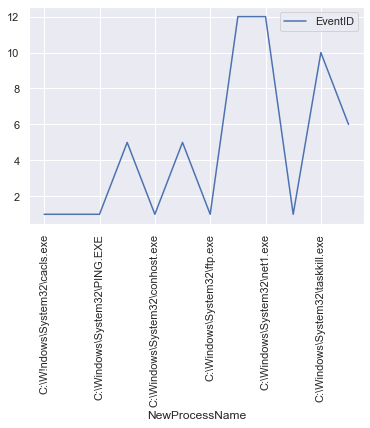

In [484]:
df[["NewProcessName", "EventID"]].groupby("NewProcessName").count().plot(rot=90)

In [485]:
@pd.api.extensions.register_dataframe_accessor("my_ext")
class PivotAccessor:
    """Pandas api extension for Pivot functions."""

    def __init__(self, pandas_obj):
        """Instantiate pivot extension class."""
        self._df = pandas_obj

    def bigplot(self, *args, **kwargs) -> pd.DataFrame:
        plt_args = kwargs
        if "figsize" not in kwargs:
            plt_args = {**kwargs, "figsize": (10, 10)}
        self._df.plot(*args, **plt_args)


C:\Users\Ian\Anaconda3\envs\condadev\lib\site-packages\ipykernel_launcher.py:1: UserWarning: registration of accessor <class '__main__.PivotAccessor'> under name 'my_ext' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  """Entry point for launching an IPython kernel.


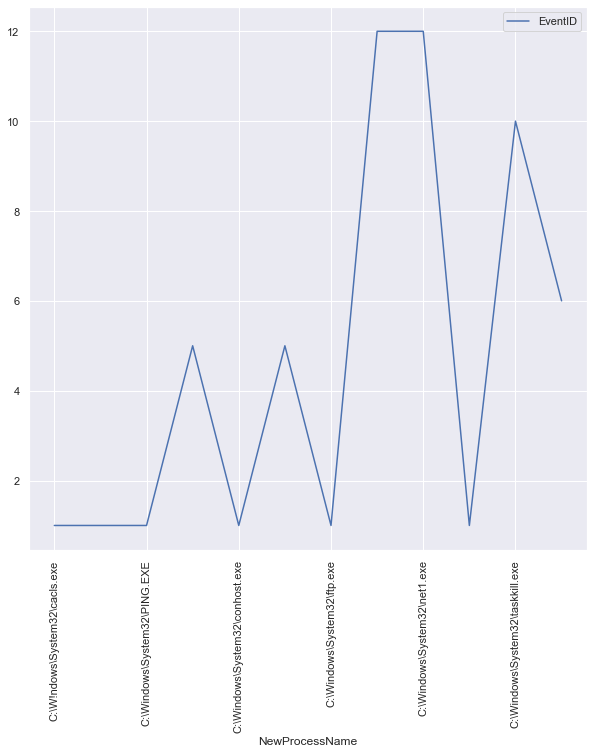

In [486]:
df[["NewProcessName", "EventID"]].groupby("NewProcessName").count().my_ext.bigplot(rot=90)

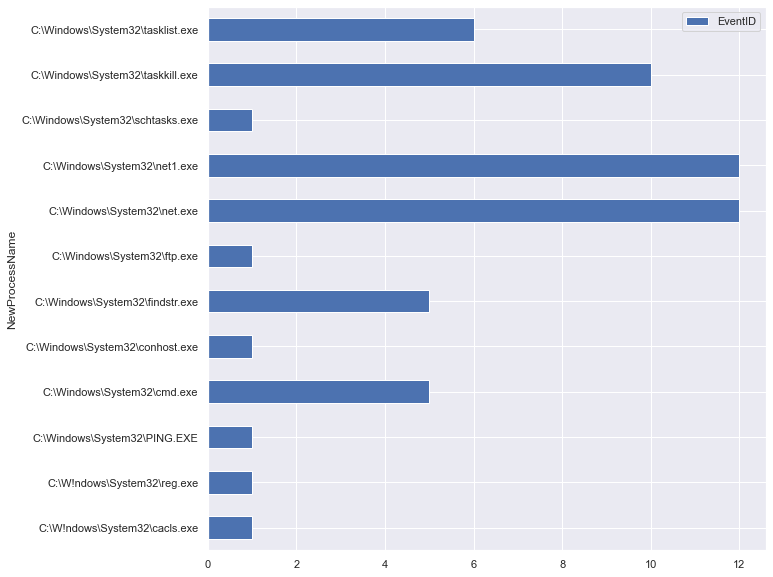

In [487]:
df[["NewProcessName", "EventID"]].groupby("NewProcessName").count().my_ext.bigplot(kind="barh")

### Reformatting Data

In [488]:
aad_df = pd.read_pickle("data/aad_df.pkl")

cols = [
    "TimeGenerated",
    "OperationName",
    "AppDisplayName",
    "LocationDetails",
]
aad_df = aad_df = aad_df[cols]
display(aad_df.head(2))

,TimeGenerated,OperationName,AppDisplayName,LocationDetails
0,2021-05-06 14:47:37.329000+00:00,Sign-in activity,Microsoft Azure PowerShell,"{'city': 'Sankt-Peterburg', 'state': 'Sankt-Peterburg', 'countryOrRegion': 'RU', 'geoCoordinates..."
1,2021-05-06 14:49:36.276000+00:00,Sign-in activity,Microsoft Azure PowerShell,"{'city': 'Sankt-Peterburg', 'state': 'Sankt-Peterburg', 'countryOrRegion': 'RU', 'geoCoordinates..."


In [489]:
aad_df.iloc[0].LocationDetails

{'city': 'Sankt-Peterburg',
 'state': 'Sankt-Peterburg',
 'countryOrRegion': 'RU',
 'geoCoordinates': {'latitude': 59.93904113769531,
  'longitude': 30.3157901763916}}

In [490]:
@pd.api.extensions.register_dataframe_accessor("my_ext5")
class PivotAccessor:
    """Pandas api extension for Pivot functions."""

    def __init__(self, pandas_obj):
        """Instantiate pivot extension class."""
        self._df = pandas_obj

    def bigplot(self, *args, **kwargs) -> pd.DataFrame:
        plt_args = kwargs
        if "figsize" not in kwargs:
            plt_args = {**kwargs, "figsize": (10, 10)}
        self._df.plot(*args, **plt_args)

    def exp_dict(self, column, drop=False):
        drop_cols = [column] if drop else []
        return pd.concat(
            [
                self._df,
                self._df.apply(
                    lambda x: self._expand_dict(x[column]),
                    axis=1,
                    result_type="expand",
                ),
            ],
            axis=1,
        ).drop(columns=drop_cols)

    @staticmethod
    def _expand_dict(col_data):
        if isinstance(col_data, str):
            column = json.loads(col_data)
        return pd.json_normalize(col_data).iloc[0]

C:\Users\Ian\Anaconda3\envs\condadev\lib\site-packages\ipykernel_launcher.py:1: UserWarning: registration of accessor <class '__main__.PivotAccessor'> under name 'my_ext5' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  """Entry point for launching an IPython kernel.


In [491]:
aad_df.head(4).my_ext5.exp_dict(column="LocationDetails")

,TimeGenerated,OperationName,AppDisplayName,LocationDetails,city,state,countryOrRegion,geoCoordinates.latitude,geoCoordinates.longitude
0,2021-05-06 14:47:37.329000+00:00,Sign-in activity,Microsoft Azure PowerShell,"{'city': 'Sankt-Peterburg', 'state': 'Sankt-Peterburg', 'countryOrRegion': 'RU', 'geoCoordinates...",Sankt-Peterburg,Sankt-Peterburg,RU,59.939041,30.31579
1,2021-05-06 14:49:36.276000+00:00,Sign-in activity,Microsoft Azure PowerShell,"{'city': 'Sankt-Peterburg', 'state': 'Sankt-Peterburg', 'countryOrRegion': 'RU', 'geoCoordinates...",Sankt-Peterburg,Sankt-Peterburg,RU,59.939041,30.31579
2,2021-05-06 14:49:34.737000+00:00,Sign-in activity,Microsoft Azure PowerShell,"{'city': 'Sankt-Peterburg', 'state': 'Sankt-Peterburg', 'countryOrRegion': 'RU', 'geoCoordinates...",Sankt-Peterburg,Sankt-Peterburg,RU,59.939041,30.31579
3,2021-05-06 14:49:35.657000+00:00,Sign-in activity,Microsoft Azure PowerShell,"{'city': 'Sankt-Peterburg', 'state': 'Sankt-Peterburg', 'countryOrRegion': 'RU', 'geoCoordinates...",Sankt-Peterburg,Sankt-Peterburg,RU,59.939041,30.31579


In [492]:
aad_df.head(4).my_ext5.exp_dict(column="LocationDetails", drop=True)

,TimeGenerated,OperationName,AppDisplayName,city,state,countryOrRegion,geoCoordinates.latitude,geoCoordinates.longitude
0,2021-05-06 14:47:37.329000+00:00,Sign-in activity,Microsoft Azure PowerShell,Sankt-Peterburg,Sankt-Peterburg,RU,59.939041,30.31579
1,2021-05-06 14:49:36.276000+00:00,Sign-in activity,Microsoft Azure PowerShell,Sankt-Peterburg,Sankt-Peterburg,RU,59.939041,30.31579
2,2021-05-06 14:49:34.737000+00:00,Sign-in activity,Microsoft Azure PowerShell,Sankt-Peterburg,Sankt-Peterburg,RU,59.939041,30.31579
3,2021-05-06 14:49:35.657000+00:00,Sign-in activity,Microsoft Azure PowerShell,Sankt-Peterburg,Sankt-Peterburg,RU,59.939041,30.31579


<br>
<h3 style="background-color: LightGray; padding: 5px">Some other examples from MSTICPy</h3>


### IoC Pattern extractor


In [494]:
aad_df = pd.read_pickle("data/aad_df.pkl")
aad_df.mp_ioc.extract(columns=["AlternateSignInName", "IPAddress"])

,IoCType,Observable,SourceIndex,Input
0,dns,seccxpninja.onmicrosoft.com,0,traveleraccount@seccxpninja.onmicrosoft.com
1,ipv4,217.119.27.212,0,217.119.27.212
2,dns,seccxpninja.onmicrosoft.com,1,traveleraccount@seccxpninja.onmicrosoft.com
3,ipv4,217.119.27.212,1,217.119.27.212
4,dns,seccxpninja.onmicrosoft.com,2,traveleraccount@seccxpninja.onmicrosoft.com
...,...,...,...,...
380,ipv4,217.119.27.212,220,217.119.27.212
381,dns,seccxpninja.onmicrosoft.com,221,traveleraccount@seccxpninja.onmicrosoft.com
382,ipv4,217.119.27.212,221,217.119.27.212
383,dns,seccxpninja.onmicrosoft.com,222,traveleraccount@seccxpninja.onmicrosoft.com


---

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Data Providers - generating functions from configuration</h1>

## Getting to data may be a bit dull but it's the foundation of security hunting:
> “Without big data, you are blind and deaf and in the middle of a freeway.”
*Geoffrey Moore*

> “In God we trust, all others bring data.”
*W Edwards Deming*

---

## Motivation:
- Needed to support multiple providers and hundreds of queries
- Make it easy for users to add queries without touching code
- Statically-defined methods (one per query) would have been unmaintainable

### Code links:
- [Adding query functions dynamically](https://github.com/microsoft/msticpy/blob/e099a09a600dee3740b10d9ccf4ac836e2cbd3a8/msticpy/data/data_providers.py#L364)
- [Query instance class](https://github.com/microsoft/msticpy/blob/master/msticpy/data/query_source.py)
- [Example queries](https://github.com/microsoft/msticpy/blob/master/msticpy/data/queries/kql_sent_winevent.yaml)
- [Example driver code](https://github.com/microsoft/msticpy/blob/master/msticpy/data/drivers/local_data_driver.py)



<h2 style="background-color: LightBlue; padding: 10px">MSTICPy Data Providers</h2>

https://msticpy.readthedocs.io/en/latest/data_acquisition/DataProviders.html

- Usually come with pre-defined queries
- Azure Sentinel queries are most developed

### Importance of pre-built queries to help analysts!

In [495]:
qry_prov_az.browse_queries()

In [496]:
qry_prov_loc.Azure.list_azure_activity_for_ip?

Signature:       qry_prov_az.Azure.list_azure_activity_for_ip(*args, **kwargs) -> Union[pandas.core.frame.DataFrame, Any]
Call signature:  qry_prov_az.Azure.list_azure_activity_for_ip(*args, **kwargs)
Type:            partial
String form:     functools.partial(<bound method QueryProvider._execute_query of <msticpy.data.data_providers.QueryProvider object at 0x00000229F036A3C8>>, query_path='Azure', query_name='list_azure_activity_for_ip')
File:            c:\users\ian\anaconda3\envs\condadev\lib\functools.py
Docstring:      
Lists Azure Activity for Caller IP Address(es)

Parameters
----------
add_query_items: str (optional)
    Additional query clauses
end: datetime (optional)
    Query end time
ip_address_list: list
    The IP Address or list of Addresses
start: datetime (optional)
    Query start time
    (default value is: -5)
table: str (optional)
    Table name
    (default value is: AzureActivity)
Class docstring:
partial(func, *args, **keywords) - new function with partial appl

In [500]:
qry_prov_loc.Network.get_network_summary()

,TimeGenerated,TotalBytesSent
0,2021-04-26 05:39:56.317964+00:00,10823
1,2021-04-26 06:39:56.317964+00:00,14821
2,2021-04-26 07:39:56.317964+00:00,13532
3,2021-04-26 08:39:56.317964+00:00,11947
4,2021-04-26 09:39:56.317964+00:00,11193
...,...,...
163,2021-05-03 00:39:56.317964+00:00,18166
164,2021-05-03 01:39:56.317964+00:00,13830
165,2021-05-03 02:39:56.317964+00:00,13350
166,2021-05-03 03:39:56.317964+00:00,11842


### Defining function behavior in Config

In [505]:
func_defn = {
    "name": "generic",
    "query": "SELECT {field} from {table}",
    "description": "Select query",
    "params":
        {
            "field": {"type": "str", "description": "column name"},
            "table": {"type": "str", "description": "table name", "default": "TABLE"}
        }
}

class QueryInstance:
    
    def __init__(self, defn):
        self.query = defn["query"]
        self.description = defn["description"]
        self.params = defn["params"]
        
query = QueryInstance(func_defn)
vars(query)

{'query': 'SELECT {field} from {table}',
 'description': 'Select query',
 'params': {'field': {'type': 'str', 'description': 'column name'},
  'table': {'type': 'str', 'description': 'table name', 'default': 'TABLE'}}}

In [506]:
class QueryInstance:
    
    def __init__(self, defn):
        self.query = defn["query"]
        self.description = defn["description"]
        self.params = defn["params"]
        
    def exec_qry(self, **kwargs):
        query = self.query.format(**kwargs)
        print(query)
        
query = QueryInstance(func_defn)

query.exec_qry(field="user", table="logons")

SELECT user from logons


### Using multiple definitions

In [507]:
func_defns = {
    "generic": {
        "query": "SELECT {field} from {table}",
        "description": "Select query",
        "params": {
            "field": {"type": "str", "description": "column name"},
            "table": {"type": "str", "description": "table name", "default": "TABLE"},
        },
    },
    "get_user": {
        "query": "SELECT user from logins where user='{username}'",
        "description": "Get user logins",
        "params": {
            "username": {"type": "str", "description": "user name"},
        },
    },
}

qrys = []
for name, func_def in func_defns.items():
    qrys.append(QueryInstance(func_def))
qrys 

### Back to queries

In [510]:
class QueryProvider:
    
    def __init__(self, name):
        self.name = name
        

qry_prov = QueryProvider("SQL")

for name, func_def in func_defns.items():
    qry_inst = QueryInstance(func_def)
    # in this simple case where there are no fixed params we can just add the function
    func = qry_inst.exec_qry
    setattr(qry_prov, name, func)
        
from pprint import pprint
pprint(vars(qry_prov))

{'generic': <bound method QueryInstance.exec_qry of <__main__.QueryInstance object at 0x00000229FA27D8C8>>,
 'get_user': <bound method QueryInstance.exec_qry of <__main__.QueryInstance object at 0x00000229FA27D0C8>>,
 'name': 'SQL'}


In [406]:
qry_prov.generic(field="host", table="host_table")
qry_prov.get_user(username="ian")

SELECT host from host_table
SELECT user from logins where user='ian'


### MSTICPy Query examples

#### AzureSentinel provider
```yaml
list_host_processes:
    description: Retrieves list of processes on a host
    args:
      query: '
        let start = datetime({start});
        let end = datetime({end});
        {table}
        {event_filter}
        {query_project}
        | where {subscription_filter}
        | where Computer {host_op} "{host_name}"
        | where TimeGenerated >= start
        | where TimeGenerated <= end
        {add_query_items}'
    parameters:
      host_name:
        description: Name of host
        type: str
      host_op:
        description: The hostname match operator
        type: str
        default: has
      start:
        description: Query start time
        type: datetime
      end:
        description: Query end time
        type: datetime
```

#### Splunk provider
```yaml
description: Retrieves all configured alerts
    args:
      query: '
      | rest/servicesNS/-/search/saved/searches
      | search alert.track=1
      | fields title description search disabled triggered_alert_count actions action.script.filename alert.severity cron_schedule'
    parameters:
```
#### OData provider
```yaml
list_alerts:
    description: Retrieves list of alerts
    metadata:
      data_source: 'graph_alert'
    args:
      query: '{path}?$filter=createdDateTime ge {start}
        and createdDateTime le {end} {add_query_items}'
      uri: None
    parameters:
```

---

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Make functions do your bidding - function wrapping</h1>


### Motivation:
- We had built a lot of functionality with inconsistent type signatures - needed:
  - to facilitate standard input and output types
  - to regularize the names of parameters
- There was no easy discovery mechanism for these functions - you had to know where to find them
- Using entities as pivot points is a "natural" investigation pattern

### Code links:
- [Entities](https://github.com/microsoft/msticpy/tree/master/msticpy/datamodel/entities)
- [Pivot registration](https://github.com/microsoft/msticpy/blob/master/msticpy/datamodel/pivot_register.py)
- [Config for registered functions](https://github.com/microsoft/msticpy/blob/master/msticpy/resources/mp_pivot_reg.yaml)

<h3 style="background-color: LemonChiffon; padding: 5px">Introducing Entities</h3>

#### Entities are simple classes that represent "real-world" Cyber objects like accounts and IP addresses


In [515]:
md(f"Some Entities:", "bold, large")
md(f"{', '.join(dir(entities)[:25])} ...", "large")

entities.IpAddress(Address="123.4.56.9")

IpAddress(Address=123.4.56.9, Type=ipaddress)

<h3 style="background-color: LemonChiffon; padding: 5px">Also introducing Pivot functions</h3>

Pivot functions are methods of entities that provide:
- data queries related to an entity
- enrichment functions relevant to that entity

Pivot functions are dynamically attached to entities. We created this
framework to make it easier to find which functions you can use for which entity type.

In [516]:
pivot.browse()

### Examples

In [517]:
IpAddress = entities.IpAddress

display(IpAddress.ip_type(value="38.75.137.9"))
IpAddress.whois("38.75.137.9")

,ip,result,src_row_index
0,38.75.137.9,Public,0


,asn,asn_cidr,asn_country_code,asn_date,asn_description,asn_registry,nets,nir,query,raw,raw_referral,referral
0,63023,38.75.136.0/23,US,1991-04-16,"AS-GLOBALTELEHOST, US",arin,"[{'cidr': '38.0.0.0/8', 'name': 'COGENT-A', 'handle': 'NET-38-0-0-0-1', 'range': '38.0.0.0 - 38....",None,38.75.137.9,None,None,None


In [518]:
display(IpAddress.ip_type(invest_ips, column="DestinationIP").head(3))
display(IpAddress.whois(invest_ips, column="DestinationIP").head(3))

,ip,result,src_row_index
0,40.124.45.19,Public,0
1,40.124.45.19,Public,1
2,13.71.172.130,Public,2


,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,None,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.76.0.0/14, 40.74.0.0/15, 40.125.0.0/17, 40.124.0.0/16, 40.80.0.0/12, 40.120.0.0/14...",None,None,None
1,None,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.76.0.0/14, 40.74.0.0/15, 40.125.0.0/17, 40.124.0.0/16, 40.80.0.0/12, 40.120.0.0/14...",None,None,None
2,None,arin,8075,13.64.0.0/11,US,2015-03-26,"MICROSOFT-CORP-MSN-AS-BLOCK, US",13.71.172.130,"[{'cidr': '13.96.0.0/13, 13.104.0.0/14, 13.64.0.0/11', 'name': 'MSFT', 'handle': 'NET-13-64-0-0-...",None,None,None


In [521]:
IpAddress.whois??

Signature:
IpAddress.whois(
    data: pandas.core.frame.DataFrame,
    ip_column: str,
    all_columns: bool = False,
    asn_col: str = 'AsnDescription',
    whois_col: Union[str, NoneType] = None,
    show_progress: bool = False,
) -> pandas.core.frame.DataFrame
Source:   
def get_whois_df(
    data: pd.DataFrame,
    ip_column: str,
    all_columns: bool = False,
    asn_col: str = "AsnDescription",
    whois_col: Optional[str] = None,
    show_progress: bool = False,
) -> pd.DataFrame:
    """
    Retrieve Whois ASN information for DataFrame of IP Addresses.

    Parameters
    ----------
    data : pd.DataFrame
        Input DataFrame
    ip_column : str
        Column name of IP Address to look up.
    all_columns:
        Expand all whois data to columns.
    asn_col : str, optional
        Name of the output column for ASN description,
        by default "ASNDescription".
        Ignored if `all_columns` is True.
    whois_col : str, optional
        Name of the output column f

<h2 style="background-color: LightBlue; padding: 10px">Wrapping functions #1 - input</h2>


In Python you can create functions that return other functions.
On the way they can change how the arguments and output are
processed.

Take this simple function that just applies proper capitalization to an input string.

In [522]:
def print_me(arg):
    print(arg.capitalize())
    
print_me("hello")

Hello


If we try to pass a list to this function we get an 
expect exception

In [523]:
print_me(["hello", "world"])

AttributeError: 'list' object has no attribute 'capitalize'

We could create a wrapper function that checked the
input and iterated over the individual items if arg is a list.
The works but we don't want to have to do this for every 
function that we want to have flexible input!

In [524]:
def print_me_list(arg):
    if isinstance(arg, list):
        for item in arg:
            print_me(item)
    else:
        print_me(arg)
        
print_me_list("hello")
print_me_list(["how", "are", "you", "?"])

Hello
How
Are
You
?


Instead we can create a function wrapper. The outer function
`dont_care_func` defines an inner function, `list_or_str` and then
returns this function. The inner function `list_or_str` is what
implements the same "is-this-a-string-or-list" logic that we 
saw in the previous example. 
Crucially though, it isn't hard-coded to call `print_me` but
calls whatever function passed to it from the outer function
`dont_care_func`.

In [316]:
# Our magic wrapper

def dont_care_func(func):
    
    def list_or_str(arg):
        if isinstance(arg, list):
            for item in arg:
                func(item)
        else:
            func(arg)

    return list_or_str

How do we use this?

We simply pass the function that we want to wrap to
`dont_care_func`. Recall, that this function just returns
an instance of the inner function. In this particular instance
the value `func` will have been replaced by the actual function
`print_me`.

In [525]:
print_stuff = dont_care_func(print_me)

Now we have a wrapped version of `print_me` that can
handle different types of input. Magic!

In [526]:
print_stuff("hello")
print_stuff(["how", "are", "you", "?"])

Hello
How
Are
You
?


We can also define further functions and create wrapped
versions of those by passing them to `dont_care_func`.

In [527]:
def shout_me(arg):
    print(arg.upper(), "\U0001F92C!", end=" ")
    
shout_stuff = dont_care_func(shout_me)

In [528]:
shout_stuff("hello")
shout_stuff(["how", "are", "you", "?"])

HELLO 🤬! HOW 🤬! ARE 🤬! YOU 🤬! ? 🤬! 

In [529]:
def any_input(func):
    
    def multi_input(arg, **kwargs):
        if isinstance(arg, list):
            for item in arg:
                func(item)
        elif isinstance(arg, pd.DataFrame):
            for item in arg[kwargs["column"]]:
                func(item)
        else:
            func(arg)
    return multi_input

In [530]:
cap_case = any_input(print_me)

cap_case("hello")
cap_case(["hello", "again"])
cap_case(ips_df, column="asn_description");

Hello
Hello
Again
Microsoft-corp-msn-as-block, us
Microsoft-corp-msn-as-block, us
Microsoft-corp-msn-as-block, us
Microsoft-corp-msn-as-block, us
Microsoft-corp-msn-as-block, us
Microsoft-corp-msn-as-block, us
Microsoft-corp-msn-as-block, us
Microsoft-corp-msn-as-block, us
As-globaltelehost, us


<h2 style="background-color: LightBlue; padding: 10px">Wrapping functions #2 - output</h2>

In [531]:

def conv_to_df(func):
    
    def convert(*args, **kwargs):
        result = func(*args, **kwargs)
        if isinstance(result, pd.DataFrame):
            return result
        if isinstance(result, str):
            return pd.DataFrame([result], columns=["value"])
        if isinstance(result, list):
            return pd.DataFrame(result, columns=["value"])
        raise TypeError(f"Unsupported type {type(result)}")
    return convert


def prop_cap(arg):
    """Capitalize string input."""
    if not isinstance(arg, str):
        raise TypeError(f"Unsupported type {type(arg)}")
    return arg.capitalize()

prop_df = conv_to_df(prop_cap)

prop_df("hello")

,value
0,Hello


<h2 style="background-color: LightBlue; padding: 10px">Combining these - Grand finale!</h2>

In [532]:
from functools import wraps

# dont_care wrapper re-written to return results rather than just print out.
def any_input(func):
    
    @wraps(func)
    def multi_input(arg, **kwargs):
        if isinstance(arg, list):
            return [func(item) for item in arg]
        elif isinstance(arg, pd.DataFrame):
            col_name = kwargs["column"]
            return pd.DataFrame(arg.apply(lambda x: func(x[col_name]), axis=1), columns=[col_name])
        else:
            return func(arg)
    return multi_input


def combined(func):
    
    # we wrap one inside the other - make sure you do it the right way around!
    w_func = any_input(func)
    
    @wraps(w_func)
    def convert(*args, **kwargs):
        result = w_func(*args, **kwargs)
        if isinstance(result, pd.DataFrame):
            return result
        if isinstance(result, str):
            return pd.DataFrame([result], columns=["value"])
        if isinstance(result, list):
            return pd.DataFrame(result, columns=["value"])
        raise TypeError(f"Unsupported type {type(result)}")
    return convert


make_proper = combined(prop_cap)

In [533]:
display(make_proper("hello"))
display(make_proper(["hello", "again"]))
display(make_proper(ips_df, column="asn_description"))
make_proper?

,value
0,Hello


,value
0,Hello
1,Again


,asn_description
0,"Microsoft-corp-msn-as-block, us"
1,"Microsoft-corp-msn-as-block, us"
2,"Microsoft-corp-msn-as-block, us"
3,"Microsoft-corp-msn-as-block, us"
4,"Microsoft-corp-msn-as-block, us"
5,"Microsoft-corp-msn-as-block, us"
6,"Microsoft-corp-msn-as-block, us"
7,"Microsoft-corp-msn-as-block, us"
8,"As-globaltelehost, us"


Signature: make_proper(arg)
Docstring: Capitalize string input.
File:      e:\src\notebooks\pycon21-demo\<ipython-input-531-3e5fbade6fcc>
Type:      function


<h3 style="background-color: LightGray; padding: 5px">What about decorators?</h3>

`combined` *is* a decorator.

We chose not to use decorators in this context because we wanted to do the wrapping
without affecting the original function.

In [534]:
@combined
def prop_cap_dec(arg):
    """Capitalize string input."""
    if not isinstance(arg, str):
        raise TypeError(f"Unsupported type {type(arg)}")
    return arg.capitalize()

In [535]:
prop_cap_dec("hello")

,value
0,Hello


<h3 style="background-color: LightGray; padding: 5px">Couldn't we have just written the funcs properly from the start?</h3>

- Hindsight is a great thing - if only you could have regular chats with your future self
- But even then it would impose a lot of complexity on each source function
- Wrapped functions lets us (mostly) get around our past incompetence
- And what if you wanted to use other peoples functions as pivot functions (or equivalent)? 

<h2 style="background-color: LightBlue; padding: 10px">The results</h2>

In [536]:
IpAddress.pivots()[15:]

['AzureSentinel.o365_activity',
 'MDE.AlertEvents_ip_alerts',
 'MDE.NetworkCommunicationEvents  _ip_connections',
 'geoloc',
 'ip_type',
 'nblt.ip_address_summary',
 'nblt.network_flow_summary',
 'qry_aad_signins',
 'qry_az_activity',
 'qry_aznet_interface',
 'qry_aznet_net_flows',
 'qry_azsent_bookmarks',
 'qry_dns_queries',
 'qry_dns_queries_from_ip',
 'qry_hb_heartbeat',
 'qry_lxsys_logon_failures',
 'qry_lxsys_logons',
 'qry_o365_activity',
 'ti.lookup_ip',
 'ti.lookup_ipv4',
 'ti.lookup_ipv4_OTX',
 'ti.lookup_ipv4_Tor',
 'ti.lookup_ipv4_VirusTotal',
 'ti.lookup_ipv4_XForce',
 'ti.lookup_ipv6',
 'ti.lookup_ipv6_OTX',
 'tilookup_ip',
 'tilookup_ipv4',
 'tilookup_ipv6',
 'util.geoloc',
 'util.geoloc_ips',
 'util.ip_rev_resolve',
 'util.ip_type',
 'util.whois',
 'whois']

In [538]:
ip_set = (
    invest_ips
    .mp_pivot.run(IpAddress.ip_type, column="DestinationIP", join="left")
    .mp_pivot.run(IpAddress.whois, column="DestinationIP", join="left")
    .mp_pivot.run(IpAddress.geoloc, column="DestinationIP", join="left")
)
display(ip_set[:3])
ip_locs = ip_set.apply(entities.GeoLocation, axis=1)
folium = FoliumMap(zoom_start=5)
folium.add_geoloc_cluster(ip_locs.values, color="blue")
folium.center_map()
folium

,SourceIP,DestinationIP,TotalBytesSent,ip,result,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress
0,10.0.3.5,40.124.45.19,621,40.124.45.19,Public,None,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.76.0.0/14, 40.74.0.0/15, 40.125.0.0/17, 40.124.0.0/16, 40.80.0.0/12, 40.120.0.0/14...",None,None,None,US,United States,Texas,San Antonio,-98.4926,29.4221,None,{},geolocation,{},40.124.45.19
1,10.0.3.5,40.124.45.19,621,40.124.45.19,Public,None,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.76.0.0/14, 40.74.0.0/15, 40.125.0.0/17, 40.124.0.0/16, 40.80.0.0/12, 40.120.0.0/14...",None,None,None,US,United States,Texas,San Antonio,-98.4926,29.4221,None,{},geolocation,{},40.124.45.19
2,10.0.3.5,40.124.45.19,621,40.124.45.19,Public,None,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.76.0.0/14, 40.74.0.0/15, 40.125.0.0/17, 40.124.0.0/16, 40.80.0.0/12, 40.120.0.0/14...",None,None,None,US,United States,Texas,San Antonio,-98.4926,29.4221,None,{},geolocation,{},40.124.45.19


### Pivot function pipelines

In [468]:
IpAddress = entities.IpAddress
invest_ips = pd.read_csv("./data/invest_ips.csv", index_col=0)
(
    invest_ips
    .mp_pivot.run(IpAddress.ip_type, column="DestinationIP", join="left")
    .mp_pivot.run(IpAddress.whois, column="DestinationIP", join="left")
    .mp_pivot.run(IpAddress.geoloc, column="DestinationIP", join="left")
).head(3)

,SourceIP,DestinationIP,TotalBytesSent,ip,result,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress
0,10.0.3.5,40.124.45.19,621,40.124.45.19,Public,None,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.76.0.0/14, 40.74.0.0/15, 40.125.0.0/17, 40.124.0.0/16, 40.80.0.0/12, 40.120.0.0/14...",None,None,None,US,United States,Texas,San Antonio,-98.4926,29.4221,None,{},geolocation,{},40.124.45.19
1,10.0.3.5,40.124.45.19,621,40.124.45.19,Public,None,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.76.0.0/14, 40.74.0.0/15, 40.125.0.0/17, 40.124.0.0/16, 40.80.0.0/12, 40.120.0.0/14...",None,None,None,US,United States,Texas,San Antonio,-98.4926,29.4221,None,{},geolocation,{},40.124.45.19
2,10.0.3.5,40.124.45.19,621,40.124.45.19,Public,None,arin,8075,40.124.0.0/16,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.124.45.19,"[{'cidr': '40.76.0.0/14, 40.74.0.0/15, 40.125.0.0/17, 40.124.0.0/16, 40.80.0.0/12, 40.120.0.0/14...",None,None,None,US,United States,Texas,San Antonio,-98.4926,29.4221,None,{},geolocation,{},40.124.45.19



<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Widget Composition</h1>

### Motivation
- IPyWidgets are awesome and supported on most Jupyter implementations
- More widgets are more awesome
  - you can build interactive classes for input and control of operations
- Collecting the functionality in a class makes the interactive package easily accessible
- However, this makes it difficult to join your widget classes into together

In [539]:
nbwidgets.QueryTime()

In [540]:
title = widgets.HTML("<h1>Please choose the correct thing</h1>")
btn = widgets.Button(description="Do some stuff")
select = widgets.Select(description="Choose a thing", options=[f"Thing {i}" for i in range(5)])
vbox = widgets.VBox([title, select, btn])
vbox

In [541]:
title = widgets.HTML("<h1>Please set the time correctly</h1>")
btn = widgets.Button(description="Do some bad sh..")
time_span = nbwidgets.QueryTime()
vbox = widgets.VBox([title, time_span, btn])

TraitError: The 'children' trait of a VBox instance contains an Instance of a TypedTuple which expected a Widget, not the QueryTime at '0x229faaf40c8'.

In [542]:
print(type(nbwidgets.QueryTime))
print(issubclass(nbwidgets.QueryTime, widgets.Widget))

<class 'abc.ABCMeta'>
False


In [543]:
title = widgets.HTML("<h1>My enclosed widget</h1>")
btn = widgets.Button(description="Do some rippin stuff")
time_span = nbwidgets.QueryTime()
vbox = widgets.VBox([title, time_span.layout, btn])
vbox

<h3 style="background-color: LightGray; padding: 5px">MSTICPy example.</h3>

In [544]:
from msticpy.config import MpConfigEdit
MpConfigEdit()

AuthKey
AuthKey


<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Dynamically extend/alter doc strings</h1>

### Motivation:
- Dynamically-created functions often look nasty
- You can extend/enhance the docstrings at run time
- Maybe store some of the help text in config files

In [449]:
# Our function definition config from earlier

func_defns = {
    "generic": {
        "query": "SELECT {field} from {table}",
        "description": "Generic select query for column and table.",
        "params": {
            "field": {"type": "str", "description": "column name"},
            "table": {"type": "str", "description": "table name", "default": "TABLE"},
        },
    },
    "get_user": {
        "query": "SELECT user from logins where user='{username}'",
        "description": "Get user logins",
        "params": {
            "username": {"type": "str", "description": "user name"},
        },
    },
}
    

In [545]:
# We add dynamic functions to a container class - QueryProvider
from functools import partial


class QueryProvider:
    
    def __init__(self, name):
        self.name = name


qry_prov = QueryProvider("SQL")

for name, func_def in func_defns.items():
    qry_inst = QueryInstance(func_def)
    func = partial(qry_inst.exec_qry)
    setattr(qry_prov, name, func)

In [546]:
qry_prov.generic?

Signature:      qry_prov.generic(**kwargs)
Call signature: qry_prov.generic(*args, **kwargs)
Type:           partial
String form:    functools.partial(<bound method QueryInstance.exec_qry of <__main__.QueryInstance object at 0x00000229FA283288>>)
File:           c:\users\ian\anaconda3\envs\condadev\lib\functools.py
Docstring:     
partial(func, *args, **keywords) - new function with partial application
of the given arguments and keywords.


In [547]:
def create_doc_str(func_defn):
    doc = [func_def["description"]]
    if "params" in func_defn:
        doc.extend([
            "",
            "Parameters",
            "----------",
        ]
        )
        for param, p_def in func_defn["params"].items():
            doc.append(f"{param} : {p_def['type']}")
            doc.append(f"    {p_def['description']}")
    doc.extend([
        "",
        "Returns",
        "-------",
        "pd.DataFrame",
        "    DataFrame with the results of the query."
    ])
    doc.extend("")
    return "\n".join(doc)


qry_prov_doc = QueryProvider("SQL")
for name, func_def in func_defns.items():
    qry_inst = QueryInstance(func_def)
    func = partial(qry_inst.exec_qry)
    func.__doc__ = create_doc_str(func_def)
    setattr(qry_prov_doc, name, func)
                       
    

In [548]:
qry_prov_doc.get_user?

Signature:       qry_prov_doc.get_user(**kwargs)
Call signature:  qry_prov_doc.get_user(*args, **kwargs)
Type:            partial
String form:     functools.partial(<bound method QueryInstance.exec_qry of <__main__.QueryInstance object at 0x00000229E4DDEAC8>>)
File:            c:\users\ian\anaconda3\envs\condadev\lib\functools.py
Docstring:      
Get user logins

Parameters
----------
username : str
    user name

Returns
-------
pd.DataFrame
    DataFrame with the results of the query.
Class docstring:
partial(func, *args, **keywords) - new function with partial application
of the given arguments and keywords.


<h3 style="background-color: LightGray; padding: 5px">MSTICPy example.</h3>

In [549]:
qry_prov_az.browse_queries()

<h3 style="background-color: LemonChiffon; padding: 5px"> Tips and Caveats</h3>

1. The `__doc__` attribute of instance methods is read-only.<br>
   To change an instance method docstring assign to `self.__class__.func.__doc__`
   
2. The Python `help(func)` function isn't much help with partials.
   
3. If you are using Sphinx or other document generator, dynamic doc strings do not make it to the API documentation.<br>
   Make sure you have something sensible in the default doc string before dynamic additions<br>
   We generate separate docs for our query functions https://msticpy.readthedocs.io/en/latest/data_acquisition/DataQueries.html

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Miscellaneous Items</h1>

<h2 style="background-color: LightBlue; padding: 10px">Create useful <b>__repr__</b>s</h2>

### Motivation
- Help your users
- Help your sanity while debugging
- Although a `repr` string is *meant* to allow you to reconstruct an object by passing
  the output to a constructor, my advice is ignore this unless it's easy to do. Would you ever actually use that?
- Make the prime consideration visibility of essential properties.

In [550]:
from datetime import datetime, timedelta
class ObscureTimeSpan:
    
    def __init__(self):
        self.start = datetime.utcnow() - timedelta(5)
        self.end = datetime.utcnow()
        
ts = ObscureTimeSpan()
ts

In [551]:
class NiceTimeSpan:
    
    def __init__(self):
        self.start = datetime.utcnow() - timedelta(5)
        self.end = datetime.utcnow()
        
    def __repr__(self):
        """Return repr string."""
        return (
            f"{self.__class__.__name__}"
            f"(start={self.start}, end={self.end})"
        )
    
ts = NiceTimeSpan()
ts

NiceTimeSpan(start=2021-05-07 00:11:57.107147, end=2021-05-12 00:11:57.107147)

<h2 style="background-color: LightBlue; padding: 10px">Build extensibility in from the start</h2>

### Motivation:
- If something looks like you (or someone) might want to extend it - build it with that in mind
- Makes it easier for users of the package to add functionality without forking it
- You will thank yourself in 2 years time
- Not everything needs to be extensible! It adds complexity, don't do it if you don't need to.

### Examples in MSTICPy:

- Pivot functions
- Data Providers
- TI Providers

### Make it even easier by making your extensibility config-driven, if possible

---

<h3 style="background-color: LightGray; padding: 5px">Example - Creating a DataProvider</h3>

#### Our base class

In [478]:
# Base class - doc strings removed for brevity
import abc
from abc import ABC

class DriverBase(ABC):
    """Base class for data providers."""

    def __init__(self, **kwargs):
        """Initialize new instance."""
        self._kwargs = kwargs
        self._loaded = False
        self._connected = False
        self.current_connection = None
        self.public_attribs: Dict[str, Any] = {}
        self.formatters: Dict[str, Callable] = {}
        self.use_query_paths = True
        self.has_driver_queries = False

    @property
    def loaded(self) -> bool:
        return self._loaded

    @property
    def connected(self) -> bool:
        return self._connected

    @property
    def schema(self) -> dict:
        return {}

    @abc.abstractmethod
    def connect(self, connection_str: str = None, **kwargs):
        """Implement this"""
        return None

    @abc.abstractmethod
    def query(
        self, query: str, query_source=None, **kwargs
    ) -> pd.DataFrame:
        """Implement this"""

#### Example dataprovider driver

In [ ]:
# Simple query provider that reads CSVs to a DataFrame
from pathlib import Path

class CSVDataDriver(DriverBase):
    """Simple query provider that reads CSVs."""

    def __init__(self, connection_str: str = None, **kwargs):
        """Instantiate LocalDataDriver and optionally connect."""
        del connection_str
        super().__init__()

        self._loaded = True
        self._data_path = connection_str or "."


    def connect(self, connection_str: str = None, **kwargs):
        """Connect to data source."""
        self._data_path = connection_str or "."
        self._connected = True

    def query(
        self, query: str, query_source=None, **kwargs
    ) -> pd.DataFrame:
        """Execute query string and return DataFrame of results."""
        file = Path(self._data_path).joinpath(query_source.source.get("file", ""))

        if not file.is_file():
            raise FileNotFoundError(
                f"Data file ({file}) for query {query} not found."
            )
        
        return pd.read_csv(file).query(query)


# YAML definition
queries_examples = """
    get_logins_by_type:
        query: '
            LogonType == {logon_type}
            '
        description: Return logon events of a given type
        file: host_logons.csv
        params:
            logon_type:
                type: "int"
                description: "Logon Type code"
                default: 3
"""

# Note - this is an illustration - you need to register the driver
# with our query provider module before this will work
# How to use
qry_prov = QueryProvider("CSVDataDriver")
qry_prov.connect("./data")
qry_prov.get_logins_by_type("logon_type==3")

<br>
<h3 style="background-color: LightGray; padding: 5px">Example 2 - Adding a pivot function - mostly config-driven</h3>


In [552]:
from hashlib import md5

def hash_input(in_str: str):
    md5_hash = "-".join(hex(b)[2:] for b in md5(in_str.encode("utf-8")).digest())
    return {
        "Title": in_str.upper(),
        "Hash": md5_hash
    }


Pivot.add_pivot_function(
    func=hash_input,
    container="cyber",  # which container it will appear in on the entity
    input_type="value",
    entity_map={"Host": "HostName"},
    func_input_value_arg="in_str",
    func_new_name="upper_hash_name",
)

entities.Host.cyber.upper_hash_name("host_name")

,Title,Hash,in_str,src_row_index
0,HOST_NAME,de-2c-d1-1-44-1c-d-4f-27-24-bf-52-cc-70-47-be,host_name,0


### Example YAML definition for a Pivot Function

```yaml
who_is:
    src_module: msticpy.sectools.ip_utils
    src_func_name: get_whois_df
    func_new_name: whois
    input_type: dataframe
    entity_map:
      IpAddress: Address
    func_df_param_name: data
    func_df_col_param_name: ip_column
    func_out_column_name: query
    func_static_params:
      all_columns: True
      show_progress: False
    func_input_value_arg: ip_address
    create_shortcut: True
```

<h2 style="background-color: LightBlue; padding: 10px">Informative and prettier exceptions</h2>

### Motivation:
- Standard exceptions can scare new users
- Often given limited information about how to fix things
- How can we turn an exception into something informative and with help links?

<h3 style="background-color: Gold; padding: 5px">Anyone from Jupyter team watching should look away now</h3>

In [555]:
from msticpy.common.exceptions import MsticpyKeyVaultConfigError
raise MsticpyKeyVaultConfigError(
    "Some !!!extra!!! stuff that we want to say here.",
    title="Something bad happened",
    another_uri=("More reading here", "https://msticpy.readthedocs.io")
)

msticpy.common.exceptions.MsticpyKeyVaultConfigError('Some !!!extra!!! stuff that we want to say here.')

### How do we plumb these into Jupyter's exception handling?

- hook `IPython.core.interactiveshell.InteractiveShell.showtraceback`
- This doesn't let us use pretty formatting (HTML, CSS)
- We cheat by displaying content of exception on Init and then swallowing exception in the handler.

In [354]:
from IPython.core.interactiveshell import InteractiveShell

def _hook_ipython_exceptions(func):
    """Hooks the `func` and bypasses it if exception is MsticpyUserException."""

    @wraps(func)
    def showtraceback(*args, **kwargs):
        """Replace IPython showtraceback."""
        # extract exception type, value and traceback
        e_type, _, _ = sys.exc_info()
        if e_type is not None and issubclass(e_type, MsticpyUserError):
            return None
        # otherwise run the original hook
        value = func(*args, **kwargs)
        return value

    return showtraceback

# InteractiveShell.showtraceback = _hook_ipython_exceptions(
#    InteractiveShell.showtraceback
#)

<h2 style="background-color: LightBlue; padding: 10px">Managing dependencies with pip "extras"</h2>

### Motivation:
- Ever-growing number of dependencies:
  - slow installs
  - more likelihood of dependency conflicts
- Most users only need core set of dependencies

### What are "extras"?

```bash
pip install msticpy[splunk]
```
Install core dependencies plus any dependencies specified by extras.



---

#### Creating them in `setup.py`
```python
EXTRAS = {
    "vt3": ["vt-py>=0.6.1", "vt-graph-api>=1.0.1", "nest_asyncio>=1.4.0"],
    "splunk": ["splunk-sdk>=1.6.0"],
    "kql": ["KqlmagicCustom[jupyter-extended]>=0.1.114.dev25"],
    "keyvault": [
        "azure-keyvault-secrets>=4.0.0",
        "azure-mgmt-keyvault>=2.0.0",
        "keyring>=13.2.1",  # needed by Key Vault package
        "msrestazure>=0.6.0",
    ],
    "ml": ["scikit-learn>=0.20.2", "scipy>=1.1.0", "statsmodels>=0.11.1"],
    "sql2kql": ["moz_sql_parser>=4.5.0,<=4.11.21016"],
}

...

setuptools.setup(
    name="msticpy",
    ...
    install_requires=INSTALL_REQUIRES,
    extras_require=EXTRAS,
```

---

#### Creating them in `pyproject.toml`

```
[options.extras_require]
vt3 = 
    vt-py>=0.6.1
    vt-graph-api>=1.0.1
    nest_asyncio>=1.4.0
splunk = splunk-sdk>=1.6.0
kql = KqlmagicCustom[jupyter-extended]>=0.1.114.dev25
```

---

### Guard the code that uses extras - and tell users what to do.

```python
try:
    from azure.mgmt.resource import ResourceManagementClient
    from azure.mgmt.network import NetworkManagementClient

except ImportError as imp_err:
    raise MsticpyImportExtraError(
        "Cannot use this feature without azure packages installed",
        title="Error importing azure module",
        extra="azure",
    ) from imp_err
```

<style>
  div.solid {border: thin solid black; padding:10px;} p.title {background-color:Tomato; padding:5px;} ul.circle {list-style-type: circle;}
</style>
<div class='solid'>
    <h3><p class='title'>MsticpyImportExtraError - Error importing azure module</p></h3>
    Cannot use this feature without azure packages installed<br>
    This feature requires one or more additional packages to be installed.<br>
    To do this run the command:<br>
    pip install msticpy[azure]<br><br>
    For more help on fixing this error see:<br>
    <ul class='circle'>
        <li><a href='https://msticpy.readthedocs.io/en/latest/getting_started/Installing.html' target='_blank' rel='noopener noreferrer'>Installing msticpy</a></li>
    </ul>
</div>


---

### Use pytest.mark.skip to keep your tests from failing

```python
_SPLUNK_IMP_OK = False
try:
    from msticpy.data.drivers import splunk_driver

    _SPLUNK_IMP_OK = True
except ImportError:
    pass

...

@pytest.mark.skipif(not _SPLUNK_IMP_OK, reason="Partial msticpy install")
def test_cust_formatters_splunk():
    """Test SplunkDriver formatting."""
    provider = UTDataDriver()
    
```

---

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Conclusion</h1>

<ul style="font=20px">
    <li>MSTICPy is a work in progress but has a broad collection of tools useful for Cyber investigators</li>
    <li>It is open source and free</li>
    <li>It is data platform independent</li>
    <li>We welcome contributions
        <ul>
            <li>Much of MSTICPy is extensible (data providers, TI providers, pivots funcs)</li>
            <li>We're especially keen on better support for data providers, new providers, queries</li>
        </ul>
</ul>
 

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Check out the recording of the companion session</h1>

<h3>"MSTICPy - Threat hunting toolkit for Jupyter Notebooks"</h3>

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Check out our PyCon Lab</h1>

# **TODO**

### &nbsp;&nbsp;&nbsp;&nbsp; TBD

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Check out our Microsoft Learn TV session</h1>

Check out our one-hour live broadcast on Microsoft Learn TV on **May 20 at 1PM PT**,
where we’ll dive deep into MSTICPy and it’s many uses! Special focus on extending MSTICPy.

More details and save-the-date at https://aka.ms/thelaunchspacemsticpy.

---

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Resources</h1>

## Get this notebook and resources @ https://aka.ms/msticpy-pycon2021

MSTICPy Documentation - https://msticpy.readthedocs.io<br>
GitHub repo - https://github.com/microsoft/msticpy<br>
Blog - https://msticpy.medium.com<br>
Introductory articles
- <a href="https://msticpy.medium.com/msticpy-v1-0-0-and-jupyter-notebooks-in-azure-sentinel-an-update-ac2f6df61f9e?source=friends_link&sk=721420baba0796878bf6c1147a28512d">MSTICPy overview</a>
- <a href="https://techcommunity.microsoft.com/t5/azure-sentinel/msticpy-and-jupyter-notebooks-in-azure-sentinel-an-update/ba-p/2279661">MSTICPy overview for Azure Sentinel users</a>

Sample notebooks:
- https://github.com/microsoft/msticpy/tree/master/docs/notebooks
- https://github.com/Azure/Azure-Sentinel-Notebooks
- MSTICPy sample notebooks [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/microsoft/msticpy/HEAD?filepath=%2Fdocs%2Fnotebooks)
  Try the EventTimeLine and ProcessTree notebooks
- Simple machine learning [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Azure/Azure-Sentinel-Notebooks/HEAD?filepath=Machine%20Learning%20in%20Notebooks%20Examples.ipynb)


<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Contacts</h1>

Email - msticpy@microsoft.com<br>
Twitter - @ianhellen, @MSSPete (Pete Bryan) @AshwinPatil (Ashwin Patil)<br>
GitHub - @ianhelle (Note the missing last "n"\), @PeteBryan, @AshwinPatil<br>
LinkedIn - @ianhellen, @PeteBryan, @AshwinPatil

---

<h1 style="border: 1px solid;background-color: LightGray; padding: 10px">Appendices/Appendixes</h1>

## Adding attributes at runtime

In [501]:
class Extensible:
    def __init__(self):
        self.prop = "Hello"


Extensible.cls_prop = "Hello class"

ext = Extensible()
ext.prop2 = "Goodbye"

# all properties
print({p: getattr(ext, p) for p in dir(ext) if not p.startswith("_")})
# instance properties
vars(ext)

{'cls_prop': 'Hello class', 'prop': 'Hello', 'prop2': 'Goodbye'}


{'prop': 'Hello', 'prop2': 'Goodbye'}

Adding methods to a class

In [502]:
def new_method(mssg):
    print(mssg)
    
Extensible.new_func = new_method

ext = Extensible()
ext.new_func()
# what is being returned from new_func()?

Assigning a method to a class creates an instance method

In [504]:
def new_method(self, mssg):
    print(self.prop, mssg)
    
Extensible.new_func = new_method
ext = Extensible()
ext.new_func("ian")

Hello ian


Creating a class method

In [244]:
def new_method(cls, mssg):
    print(cls.cls_prop, mssg)
    
Extensible.new_func = classmethod(new_method)
ext = Extensible()
ext.new_func("ian")
Extensible.new_func("ian")

Hello class ian
Hello class ian


In [245]:
def new_method(mssg):
    print(mssg)
    
Extensible.new_func = staticmethod(new_method)
ext = Extensible()
ext.new_func("ian")
Extensible.new_func("ian")

ian
ian


## Using partial functions with QueryProvider

In [511]:
from functools import partial

def greet(salutation, name):
    print(salutation, name)
    
greet("Hello", "Pete")

Hello Pete


In [512]:
hello = partial(greet, "Hello")
hello("Ian")

Hello Ian


In [514]:
class QueryProvider:
    
    def __init__(self, name):
        self.name = name
        

qry_prov = QueryProvider("SQL")

for name, func_def in func_defns.items():
    qry_inst = QueryInstance(func_def)
    # We can use partial functions if we want to add params
    # that remain the static for all queries
    func = partial(qry_inst.exec_qry, name=name)
    setattr(qry_prov, name, func)
        
pprint(vars(qry_prov))
print()
qry_prov.generic(field="host", table="host_table")
qry_prov.get_user(username="ian")

{'generic': functools.partial(<bound method QueryInstance.exec_qry of <__main__.QueryInstance object at 0x00000229FA283288>>, name='generic'),
 'get_user': functools.partial(<bound method QueryInstance.exec_qry of <__main__.QueryInstance object at 0x00000229FA283908>>, name='get_user'),
 'name': 'SQL'}

SELECT host from host_table
SELECT user from logins where user='ian'
